In [9]:
import numpy as np
from pathlib import Path
import utils as utils
import harp
import matplotlib.pyplot as plt

In [10]:
root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-21T14-24-20/2025-01-21T14-24-20')

In [24]:
metadata_reader = utils.SessionData()
session_settings = utils.load_json(metadata_reader, root/"SessionSettings")

print(session_settings.iloc[0]['metadata'].sequences)

[DotMap(rewardCondition1=[[{'command': 'OdorA', 'rewarded': True}]], rewardCondition2=[[{'command': 'OdorE', 'rewarded': True}]], enableTrialIndicator=True, presentationTime=0.8, interCommand='Purge', interCommandTime=0.2, repeatCount=20, maximumTime=1.0, responseTime=99999.0, resetOnReward=True, interTrialInterval=0.0, name='OdourDiscrimination', defaultCommand='Default', enableRewardLocationIndicator=True)]


                               EndValve0  EndValve1  ValveDummy
Time                                                           
1904-01-01 21:36:55.789504000      False      False       False
1904-01-01 22:16:11.496544000      False       True       False
1904-01-01 22:16:12.146528000      False      False       False
1904-01-02 08:00:19.006496000      False       True       False
1904-01-02 08:00:19.454496000      False      False       False
1904-01-02 09:33:39.283488000       True      False       False
1904-01-02 09:33:40.094496000       True       True       False
1904-01-02 09:33:40.297504000      False      False       False
1904-01-02 10:04:06.716480000       True      False       False
1904-01-02 10:04:07.217504000      False      False       False
1904-01-02 10:07:12.550496000       True      False       False
1904-01-02 10:07:13.064479999      False      False       False
1904-01-02 10:12:14.756480000      False       True       False
1904-01-02 10:12:15.570496000       True

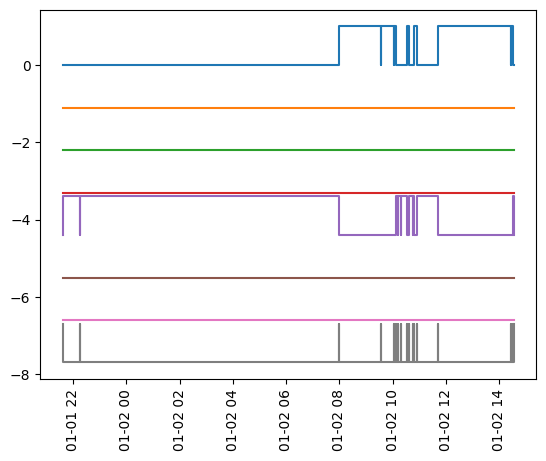

In [41]:
behavior_reader = harp.create_reader('device_schemas/behavior.yml', epoch=harp.REFERENCE_EPOCH)
olfactometer_reader = harp.create_reader('device_schemas/olfactometer.yml', epoch=harp.REFERENCE_EPOCH)

digital_input_data = utils.load(behavior_reader.DigitalInputState, root/"Behavior")
olfactometer_valves_0 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer0")
olfactometer_valves_1 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer1")
olfactometer_end_0 = utils.load(olfactometer_reader.EndValveState, root/"Olfactometer0")

print(olfactometer_end_0)

plt.figure()
plt.xticks(rotation=90)
plt.step(olfactometer_valves_0.index, olfactometer_valves_0['Valve0'] * 1)
plt.step(olfactometer_end_0.index, olfactometer_valves_0['Valve0'] * 1)
# plt.step(olfactometer_valves_0.index, olfactometer_valves_0['Valve1'] * 1 - 1.1)
# plt.step(olfactometer_valves_0.index, olfactometer_valves_0['Valve2'] * 1 - 2.2)
# plt.step(olfactometer_valves_0.index, olfactometer_valves_0['Valve3'] * 1 - 3.3)
# plt.step(olfactometer_valves_1.index, olfactometer_valves_1['Valve0'] * 1 - 4.4)
# plt.step(olfactometer_valves_1.index, olfactometer_valves_1['Valve1'] * 1 - 5.5)
# plt.step(olfactometer_valves_1.index, olfactometer_valves_1['Valve2'] * 1 - 6.6)
# plt.step(olfactometer_valves_1.index, olfactometer_valves_1['Valve3'] * 1 - 7.7)